In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #,StandardScaler
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import warnings
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utilities")

from features_creation import features_creation

pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('../data/preprocess_data.csv',sep = ',')

In [3]:
pd.options.display.max_columns = None
data.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
0,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4,24.0,45.161290,45.833333,51.274083,50.892857,31.250000,60.000000,17.866258,11.702750,4.388531,6.976744,1.178571,37.375,96.547689,83.525346,13.022343,40.000000,15.143172,0.785714,0.571429,39.8,-8.0,0,0,0,0,1,0,0
1,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5,31.0,50.000000,16.129032,60.232005,57.758621,21.428571,73.529412,21.116847,10.095911,1.261989,2.857143,1.396552,38.375,102.221100,108.055010,-5.833909,44.285714,6.967670,0.277778,0.444444,46.3,7.0,0,0,0,0,1,0,0
2,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4,35.0,47.540984,45.714286,64.759036,64.516129,32.142857,60.606061,13.089005,14.836795,1.483680,2.173913,1.387097,65.250,127.596439,117.021277,10.575163,55.555556,19.138756,1.600000,1.000000,70.0,-9.0,0,0,0,0,1,0,0
3,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,

In [4]:
data['Match Date']=pd.to_datetime(data['Match Date'])

In [5]:
data.shape

(5214, 108)

# Greek Basket League

In [6]:
greece_features = pd.read_csv('Features_Per_Tournament/greece_features.csv',sep = ',')

x_greece = greece_features.iloc[:,:-1]
y_greece = greece_features.iloc[:,-1]

x1_greece = data[(data['Tournament'] =="Basket League")&(data['Match Date'] >"2014-8-01")]

In [7]:
x_greece.shape

(824, 110)

In [8]:
x_greece.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Regular Season
0,1.0,1.0,7.0,24.0,12.965488,39.203953,1.0,7.0,12.965488,4.042062,8075.979273,0.015165,0.174208,5.970085,-2.101188,9.641378,-0.432497,9.990852,15.431090,9.079460,-3.192595,6.448783,2.365221,3.558226,4.722069,4.304190,1.224877,0.460950,0.678483,1.862390,-0.148764,1.012097,0.479169,-0.756018,0.219079,-8.554788,-11.105235,-6.513194,-1.326533,-2.411859,-4.069079,-4.735595,-1.607285,-0.571417,-0.592554,0.308889,1.148496,0.537714,0.001857,10.254067,-4678.850681,0.047324,0.2,5.500000,-2.189467,7.553520,-1.565572,4.875000,10.500000,5.580000,-0.205287,7.348233,0.851638,3.700000,5.371651,3.811743,2.408362,2.444850,0.776986,0.713120,2.906884,2.418038,0.945326,1.556858,2.082839,-9.587500,-10.200000,-6.590000,-1.054341,-1.8,-2.950226,-4.475464,0.636194,2.074724,0.943416,-0.623956,0.123073,-1.369185,-2.168104,5.059406,14.292435,6.31299,20.195041,7.730198,11.227723,8.098515,-6.31299,2.142763,1.63198,0.966725,0.059591,-0.951833,-0.336871,1.264746,0.254944,-0.898527,-1.398932,-0.763506,0.663366,1
1,1.0,1.0,22.0,31.0,37.052204,56.404916,1.0,22.0,37.052204,5.150631,52309.744068,0.352980,0.468254,20.238095,2.202237,29.856230,0.703602,23.261905,30.234127,19.616667,-16.176934,13.679296,7.044144,8.361111,8.382297,9.870524,8.053079,11.284686,8.140742,-3.140043,3.914813,1.183493,5.117991,2.475858,1.469511,-17.083829,-26.980159,-15.956746,-6.805604,-11.876984,-8.888798,-9.173924,-5.769824,-5.519784,-4.281748,-2.233573,0.188011,-0.610097,-1.547129,11.108951,12848.804546,0.415176,0.3,20.700000,-2.060397,31.497456,-5.999200,18.237500,24.000000,14.570000,-19.13819

In [9]:
corr_df = greece_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
110,Team Result,1.000000
13,history_pointsdiff,0.570310
15,history_Ediff,0.568344
53,Current_form_pointsdiff,0.552079
55,Current_form_EDiff,0.549976
10,elo,0.544961
17,history_FIC,0.538887
12,history_winner,0.538133
9,pi_ratings,0.534898
18,history_Performance_Index,0.527202


## Classifiers

In [10]:
x_greece_scaled = MinMaxScaler().fit_transform(x_greece)
#x_greece_scaled = StandardScaler().fit_transform(x_greece)

In [11]:
x_train_greece=x_greece_scaled[:len(x1_greece[x1_greece["Match Date"]<"2017-8-1"])]
y_train_greece=y_greece.iloc[:len(x1_greece[x1_greece["Match Date"]<"2017-8-1"])]
x_test_greece=x_greece_scaled[len(x1_greece[x1_greece["Match Date"]<"2017-8-1"]):]
y_test_greece=y_greece.iloc[len(x1_greece[x1_greece["Match Date"]<"2017-8-1"]):]

## Logistic Regression

In [12]:
lgr = LogisticRegression(solver='liblinear',C=0.6938346614477142, penalty =  'l2').fit(x_train_greece, y_train_greece)
y_pre_proba_lgr=lgr.predict_proba(x_test_greece)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_greece),3))


Logistic Regression

Test BS: 0.145

Test Accuracy: 0.77

Test F1-score: 0.833


In [13]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_greece.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef1,'greek_league')
sorted_coef1

,feature_name,value
0,pagerank,1.340512
1,elo,1.092596
2,pi_ratings,0.952743
3,history_pointsdiff_sd,0.899557
4,history_Ediff_sd,0.859207
5,Tournament_home_winner,-0.854092
6,Current_form_Points_sd,-0.824987
7,Current_form_Points_received_sd,-0.819559
8,history_Ediff,0.783546
9,history_FIC,0.727863


## Random Forest Classifier

In [14]:
rfc = RandomForestClassifier(max_depth= 13,max_features= 'sqrt',  min_samples_leaf= 0.040856687662947255,
                             min_samples_split= 0.1208432060337375,n_estimators= 79, 
                            random_state =2).fit(x_train_greece, y_train_greece)

y_pre_proba_rfc=rfc.predict_proba(x_test_greece)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_greece),3))

Random Forest Classifier

Test BS: 0.15

Test Accuracy: 0.755

Test F1-score: 0.818


In [15]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_greece.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef2,'greek_league')
sorted_coef2

,feature_name,value
0,pi_ratings,0.100072
1,history_pointsdiff,0.077972
2,pagerank,0.069814
3,history_FIC,0.059847
4,elo,0.054123
5,history_Performance_Index,0.053663
6,Current_form_pointsdiff,0.044857
7,history_Ediff,0.042386
8,Current_form_EDiff,0.037951
9,history_Game_Score,0.036717


## xgboost

In [16]:
alg = XGBClassifier(booster='gbtree', objective='binary:logistic', colsample_bytree=0.622779742930514,
                    gamma=9.956582635690857,learning_rate=0.1345234453980909,max_depth=4,
                    n_estimators=81,reg_lambda= 0.9892757700055931,subsample=0.8024427587538274, 
                    verbosity=1).fit(x_train_greece, y_train_greece)

y_pre_proba_alg=alg.predict_proba(x_test_greece)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_greece),3))


xgboost

Test BS: 0.15

Test Accuracy: 0.779

Test F1-score: 0.833


In [17]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_greece.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef3,'greek_league')
sorted_coef3

,feature_name,value
0,Current_form_pointsdiff,0.180196
1,pi_ratings,0.101307
2,history_Ortg,0.037690
3,history_Ediff,0.035357
4,history_FIC,0.033449
5,pagerank,0.033160
6,history_TS_received,0.032607
7,elo,0.027395
8,history_EFG,0.024157
9,history_Performance_Index_received,0.023714


# Ensemble

In [18]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_greece,ens_proba),3))
print()
y_pre_ens=np.where(pd.Series(ens_proba)>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_ens,y_test_greece),3))
print()
print("Test F1-score:",round(f1_score(y_pre_ens,y_test_greece),3))


------Ensemble 3 classifier-------

Test BS: 0.145

Test Accuracy: 0.784

Test F1-score: 0.839


In [19]:
pd.options.display.max_rows = None
see_final_g=x1_greece[["Home Team","Away Team","Team Result"]][x1_greece["Match Date"]>"2017-8-1"]
see_final_g["prediction probability"]=ens_proba
see_final_g["RPS"]=(see_final_g["Team Result"]-see_final_g["prediction probability"])**2
see_final_g[see_final_g["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4257,PAOK,Promitheas Patras,0.0,0.822702,0.676839
4374,Rethymno,Lavrio,0.0,0.758392,0.575159
4514,Ifaistos Limnou,Rethymno,0.0,0.778020,0.605314
4554,Trikala,Kymi,0.0,0.861827,0.742746
4561,AEK,Olympiacos,1.0,0.213910,0.617937
4593,Promitheas Patras,Kolossos Rhodes,0.0,0.767067,0.588392
4703,PAOK,Olympiacos,1.0,0.151542,0.719881
4803,Aris,Koroivos,0.0,0.879803,0.774054
4956,Panionios,AEK,1.0,0.229849,0.593133
5046,AEK,PAOK,0.0,0.777962,0.605224


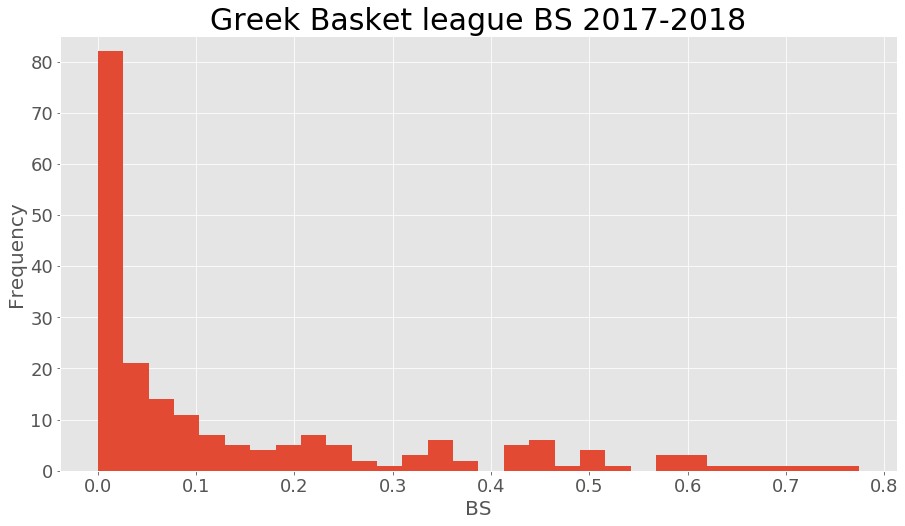

In [20]:
plt.figure(figsize=(15,8))

plt.hist(see_final_g["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Greek Basket league BS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()

In [21]:
see_final_g=x1_greece[["Home Team","Away Team","Team Result","Match Date"]][x1_greece["Match Date"]>"2017-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [22]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

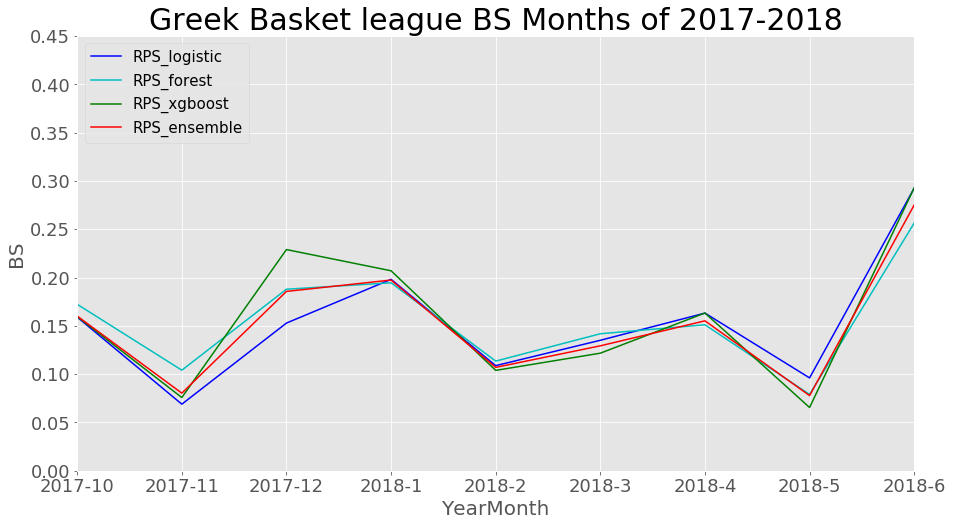

In [23]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Greek Basket league BS Months of 2017-2018',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

# Liga ACB

In [24]:
spain_features = pd.read_csv('Features_Per_Tournament/spain_features.csv',sep = ',')

x_spain = spain_features.iloc[:,:-1]
y_spain = spain_features.iloc[:,-1]

x1_spain = data[(data['Tournament'] =="Liga ACB")&(data['Match Date'] >"2014-8-01")]

In [25]:
x_spain.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Regular Season
0,1.0,0.0,14.0,-2.0,17.990453,-1.269583,1.0,14.0,17.990453,2.309739,8417.044583,0.007679,0.101749,2.090901,4.718214,1.910082,5.810128,-2.733725,-5.503870,-2.711464,-1.429391,0.480691,0.890890,-3.020554,-1.460292,-1.217378,-3.265055,-5.607371,-4.229594,4.348055,-3.716272,-0.527336,-2.356488,-1.044294,0.308242,-2.106026,-3.556072,-2.824475,-0.661397,-5.111455,-1.118510,-1.569399,6.053580,7.938776,5.964821,1.483353,3.183276,0.329476,-0.429860,9.936528,-46396.876168,0.018427,0.1,1.083333,3.887738,1.251014,4.687714,-0.177083,-0.666667,1.366667,0.849181,2.100195,1.698301,-0.166667,2.461168,2.557267,-5.736181,-10.563142,-8.402632,2.816725,-5.024433,-1.130965,-4.645749,-1.593389,0.298256,4.505208,4.250000,2.933333,-0.703707,-1.250000,0.259383,0.368464,6.774342,8.583450,5.653496,0.999822,1.582060,0.308038,-1.023089,3.167173,15.771527,4.569777,21.657067,6.848404,9.006079,6.579635,-4.569777,1.912877,0.882660,0.844757,1.277193,1.191717,1.006683,0.343711,-0.041624,0.090494,0.046085,-0.021069,0.577508,1
1,-1.0,0.0,-17.0,4.0,-20.616174,8.452801,-1.0,-17.0,-20.616174,2.562303,19966.431066,0.004552,0.176471,10.235294,-0.610282,14.260671,-0.027256,9.040441,10.529412,8.697059,-9.349642,4.911029,1.644398,2.470588,3.064226,2.869708,-0.852473,-1.120972,-0.538501,2.526986,1.137144,0.024008,-0.848303,1.158594,0.730367,-14.224265,-17.705882,-13.897059,-5.935847,-7.764706,-3.332770,-4.034405,-1.524278,0.001888,0.125148,1.158526,1.631400,1.400530,1.485509,9.379124,46.544607,0.011875,0.3,13.500000,-2.840492,18.819376,-0.847528,11.328125,17.708333,11.725000,-12.5

In [26]:
corr_df = spain_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
110,Team Result,1.000000
13,history_pointsdiff,0.419945
17,history_FIC,0.419496
19,history_Game_Score,0.417507
9,pi_ratings,0.413958
15,history_Ediff,0.413439
12,history_winner,0.408710
18,history_Performance_Index,0.408109
53,Current_form_pointsdiff,0.376920
3,tradition_pointsdiff_general,0.373335


## Classifiers

In [27]:
x_spain_scaled = MinMaxScaler().fit_transform(x_spain)

In [28]:
x_train_spain=x_spain_scaled[:len(x1_spain[x1_spain["Match Date"]<"2017-8-1"])]
y_train_spain=y_spain.iloc[:len(x1_spain[x1_spain["Match Date"]<"2017-8-1"])]
x_test_spain=x_spain_scaled[len(x1_spain[x1_spain["Match Date"]<"2017-8-1"]):]
y_test_spain=y_spain.iloc[len(x1_spain[x1_spain["Match Date"]<"2017-8-1"]):]

## Logistic Regression

In [29]:
lgr = LogisticRegression(solver='liblinear',C=1.1171121660141514, penalty = "l1").fit(x_train_spain, y_train_spain)
y_pre_proba_lgr=lgr.predict_proba(x_test_spain)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(pd.Series(y_pre_proba_lgr[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_spain),3))


Logistic Regression

Test BS: 0.198

Test Accuracy: 0.697

Test F1-score: 0.763


In [30]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_spain.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef1,'liga_acb')
sorted_coef1

,feature_name,value
0,history_Game_Score,3.746098
1,history_pointsdiff,3.276623
2,tradition_pointsdiff_general,1.297826
3,history_TS_received_sd,-1.087455
4,Current_form_elo,0.999940
5,Tournament_Play,-0.955011
6,history_pointsdiff_sd,0.817275
7,Tournament_Play_sd,-0.690229
8,Current_form_FIC_received,-0.689236
9,Regular Season,-0.501832


## Random Forest Classifier

In [31]:
rfc = RandomForestClassifier(max_depth= 19, max_features='log2', min_samples_leaf=0.05051947157434511,
                             min_samples_split=0.009080645821703, n_estimators=6,random_state=2
                            ).fit(x_train_spain, y_train_spain)

y_pre_proba_rfc=rfc.predict_proba(x_test_spain)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(pd.Series(y_pre_proba_rfc[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_spain),3))

Random Forest Classifier

Test BS: 0.2

Test Accuracy: 0.713

Test F1-score: 0.783


In [32]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_spain.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef2,'liga_acb')
sorted_coef2

,feature_name,value
0,history_Game_Score,0.168644
1,pi_ratings,0.126291
2,history_FIC,0.106632
3,history_Play,0.085417
4,Current_form_Play,0.058184
5,history_Points,0.046883
6,Current_form_pointsdiff,0.040503
7,history_Game_Score_received,0.035815
8,history_FIC_received_sd,0.035778
9,Current_form_EDiff,0.034074


## xgboost

In [33]:
alg = XGBClassifier( colsample_bytree = 0.07729623870011615, gamma=8.97884898043499, learning_rate= 0.06271738449490522, 
                    max_depth= 14, n_estimators= 86, reg_lambda= 0.9451160660551007,subsample= 0.3700523653489849
                    ,objective='binary:logistic').fit(x_train_spain, y_train_spain)

y_pre_proba_alg=alg.predict_proba(x_test_spain)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(pd.Series(y_pre_proba_alg[:,1])>0.5,1,0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_spain),3))


xgboost

Test BS: 0.201

Test Accuracy: 0.709

Test F1-score: 0.784


In [34]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_spain.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef3,'liga_acb')
sorted_coef3

,feature_name,value
0,history_Ediff,0.053800
1,pi_ratings,0.041470
2,history_Play,0.035743
3,history_pointsdiff,0.035067
4,Current_form_Points,0.034559
5,history_FIC,0.033007
6,history_TS,0.030797
7,Current_form_Game_Score,0.030491
8,tradition_winner_general,0.030023
9,history_Ortg,0.027036


# Ensemble

In [35]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_spain,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_spain),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_spain),3))

------Ensemble 3 classifier-------

Test BS: 0.197

Test Accuracy: 0.719

Test F1-score: 0.788


In [36]:
pd.options.display.max_rows = None
see_final_l=x1_spain[["Home Team","Away Team","Team Result"]][x1_spain["Match Date"]>"2017-8-1"]
see_final_l["prediction probability"]=ens_proba
see_final_l["RPS"]=(see_final_l["Team Result"]-see_final_l["prediction probability"])**2
see_final_l[see_final_l["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4250,Andorra,Fuenlabrada,0.0,0.783103,0.613250
4268,Fuenlabrada,Unicaja Malaga,1.0,0.277364,0.522202
4307,Gipuzkoa,Murcia,0.0,0.755340,0.570538
4384,Gipuzkoa,Bilbao,0.0,0.746184,0.556790
4385,Barcelona,Murcia,0.0,0.827045,0.684003
4386,Baskonia,Zaragoza,0.0,0.877218,0.769511
4411,Unicaja Malaga,Baskonia,0.0,0.748460,0.560192
4445,Estudiantes,Fuenlabrada,0.0,0.788094,0.621092
4451,Real Madrid,Barcelona,0.0,0.758233,0.574917
4522,Bilbao,Burgos,0.0,0.777025,0.603769


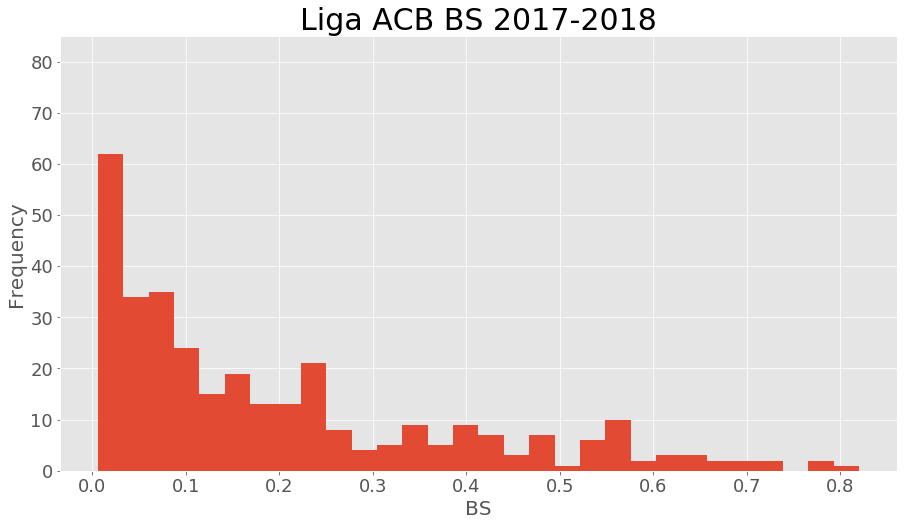

In [37]:
plt.figure(figsize=(15,8))

plt.hist(see_final_l["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Liga ACB BS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()

In [38]:
see_final_g=x1_spain[["Home Team","Away Team","Team Result","Match Date"]][x1_spain["Match Date"]>"2017-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [39]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

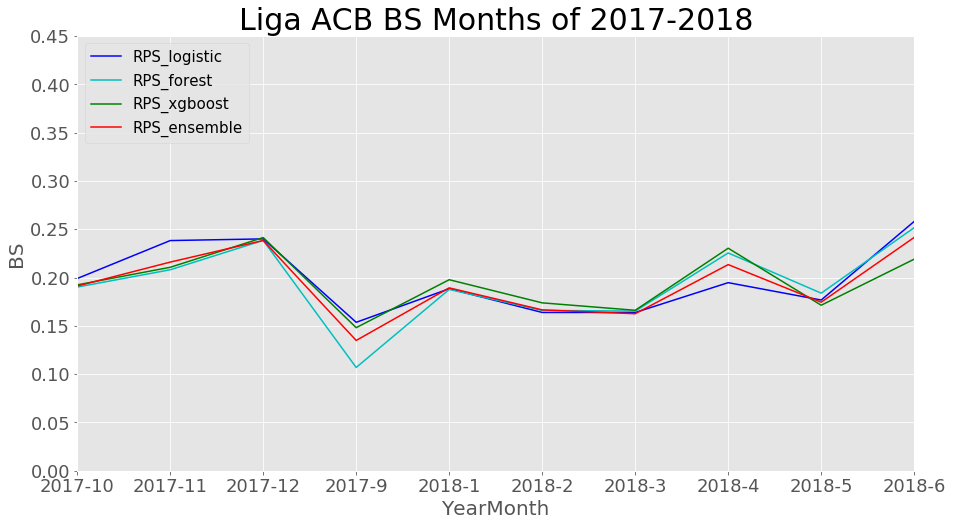

In [40]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Liga ACB BS Months of 2017-2018',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

# Euroleague

In [41]:
euroleague_features = pd.read_csv('Features_Per_Tournament/euroleague_features.csv',sep = ',')

x_el = euroleague_features.iloc[:,:-1]
y_el = euroleague_features.iloc[:,-1]

x1_el = data[(data['Tournament'] =="Euroleague")&(data['Match Date'] >"2014-8-01")]

In [42]:
x_el.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Playoffs,Regular Season,Top 16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.373791,-26723.352082,0.095957,0.458333,0.500000,15.877185,0.000000,22.279430,53.188542,82.266667,55.054167,107.951219,105.640492,42.923241,76.266667,56.843544,52.787281,15.396357,20.762677,16.272997,12.725118,15.913580,7.582340,12.384340,7.959149,9.200955,55.797917,83.391667,58.383333,44.400159,78.391667,57.246732,53.647798,14.234869,16.915223,13.486657,5.721895,9.458336,6.622339,7.553833,9.536637,24059.283687,0.035817,0.4,0.500000,18.852790,0.000000,25.883217,52.562500,82.800000,54.200000,107.983821,101.730289,41.440818,75.900,55.314807,51.222421,20.215249,26.961390,21.894248,14.128821,18.904035,10.310516,16.798896,9.528706,11.494851,56.875000,83.500000,59.550000,44.900496,80.300000,57.438294,54.035480,15.811686,18.025466,15.232154,7.222027,9.518569,6.722892,7.837010,4.288538,13.919011,6.265154,20.279197,8.386364,11.695652,7.732806,-6.265154,2.760062,2.273842,2.227534,0.515439,-0.363608,-0.062906,0.277831,-0.092212,-0.671777,-0.280759,-0.145696,0.632411,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.769611,-35606.324056,-0.038914,-0.689655,-4.119048,-11.460430,0.000000,-16.900692,-57.857143,-86.109524,-58.600714,-106.021752,-112.219501,-46.458792,-77.242857,-57.914210,-55.193912,-12.662260,-18.698903,-14.083352,-15.387009,-14.257306,-6.217194,-11.076084,-7.922758,-8.247312,-48.538988,-74.176190,-51.120238,-42.993824,-73.123810,-53.847811,-49.445085,-12.220545,-15.079866,-13.256618,-7.823858,-11.246717,-6.446500,-8.207869,0.000000,0.000000,0.000000,-0.6,-3.333333,-11.615626,0.00

In [43]:
corr_df =euroleague_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
112,Team Result,1.000000
13,history_pointsdiff,0.348831
15,history_Ediff,0.337053
9,pi_ratings,0.329471
12,history_winner,0.318547
53,Current_form_pointsdiff,0.311046
55,Current_form_EDiff,0.301129
52,Current_form_winner,0.279119
11,pagerank,0.272431
10,elo,0.255749


## Classifiers

In [44]:
x_el_scaled = MinMaxScaler().fit_transform(x_el)

In [45]:
x_train_el=x_el_scaled[:len(x1_el[x1_el["Match Date"]<"2017-8-1"])]
y_train_el=y_el.iloc[:len(x1_el[x1_el["Match Date"]<"2017-8-1"])]
x_test_el=x_el_scaled[len(x1_el[x1_el["Match Date"]<"2017-8-1"]):]
y_test_el=y_el.iloc[len(x1_el[x1_el["Match Date"]<"2017-8-1"]):]

## Logistic Regression

In [46]:
lgr = LogisticRegression(solver = "liblinear",penalty = 'l2',C= 0.18004542465707152).fit(x_train_el,y_train_el)
y_pre_proba_lgr=lgr.predict_proba(x_test_el)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(y_pre_proba_lgr[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_el),3))

Logistic Regression

Test BS: 0.22

Test Accuracy: 0.662

Test F1-score: 0.77


In [47]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_el.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef1,'euroleague')
sorted_coef1

,feature_name,value
0,history_pointsdiff,0.586724
1,history_Ediff,0.509245
2,Current_form_Play_sd,-0.482044
3,pagerank,0.476534
4,history_winner,0.456066
5,Current_form_pointsdiff,0.422070
6,Tournament_Drtg_sd,-0.393871
7,pi_ratings,0.392518
8,Current_form_EDiff,0.321522
9,tradition_winner_general,0.319348


## Random Forest Classifier

In [48]:
rfc = RandomForestClassifier(max_depth= 23, max_features='log2', min_samples_leaf=0.09173060912716552,
                             min_samples_split=0.0453337140365549, n_estimators=4,
                             random_state=2).fit(x_train_el, y_train_el)

y_pre_proba_rfc=rfc.predict_proba(x_test_el)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_el),3))

Random Forest Classifier

Test BS: 0.209

Test Accuracy: 0.665

Test F1-score: 0.749


In [49]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_el.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef2,'euroleague')
sorted_coef2

,feature_name,value
0,history_Ortg,0.156113
1,Current_form_FIC,0.145867
2,pagerank,0.144230
3,Current_form_EDiff,0.135497
4,history_Game_Score,0.115227
5,Current_form_Game_Score_received,0.058060
6,history_Drtg,0.054681
7,history_Performance_Index,0.046786
8,history_EFG,0.044383
9,history_pointsdiff_sd,0.035622


## xgboost

In [50]:
alg = XGBClassifier(colsample_bytree=0.08978735702676666,gamma= 9.580517477927494,
                    learning_rate= 0.1641745913705116, max_depth=39, n_estimators=33,
                    reg_lambda= 0.6415591428560243,subsample=0.9964435009093792,
                    objective='binary:logistic').fit(x_train_el, y_train_el)

y_pre_proba_alg=alg.predict_proba(x_test_el)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_el,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_el),3))


xgboost

Test BS: 0.208

Test Accuracy: 0.692

Test F1-score: 0.778


In [51]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_el.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef3,'euroleague')
sorted_coef3

,feature_name,value
0,Current_form_pointsdiff,0.087382
1,history_Game_Score,0.087246
2,Current_form_FIC,0.052428
3,history_Ediff,0.052071
4,history_pointsdiff,0.038417
5,Current_form_Game_Score,0.034421
6,elo,0.028894
7,pi_ratings,0.025597
8,pagerank,0.024387
9,Tournament_Drtg,0.024041


# Ensemble 

In [52]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_el,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_el),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_el),3))

------Ensemble 3 classifier-------

Test BS: 0.209

Test Accuracy: 0.681

Test F1-score: 0.774


In [53]:
see_final_el=x1_el[["Home Team","Away Team","Team Result"]][x1_el["Match Date"]>"2017-8-1"]
see_final_el["prediction probability"]=y_pre_proba_alg[:,1]
see_final_el["RPS"]=(see_final_el["Team Result"]-see_final_el["prediction probability"])**2
see_final_el[see_final_el["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4285,Bamberg,Maccabi Tel Aviv,0.0,0.756186,0.571817
4362,Baskonia,Valencia,0.0,0.733825,0.538499
4403,Real Madrid,Khimki,0.0,0.871884,0.760181
4407,Anadolu Efes,Unicaja Malaga,0.0,0.802178,0.643490
4462,Fenerbahce,Olympiacos,0.0,0.839078,0.704053
4469,Valencia,Armani Milano,0.0,0.815232,0.664603
4476,Zalgiris,Baskonia,0.0,0.765552,0.586069
4478,CSKA Moscow,Fenerbahce,0.0,0.796859,0.634984
4511,Real Madrid,Crvena Zvezda,0.0,0.853885,0.729120
4542,Zalgiris,Panathinaikos,1.0,0.271769,0.530320


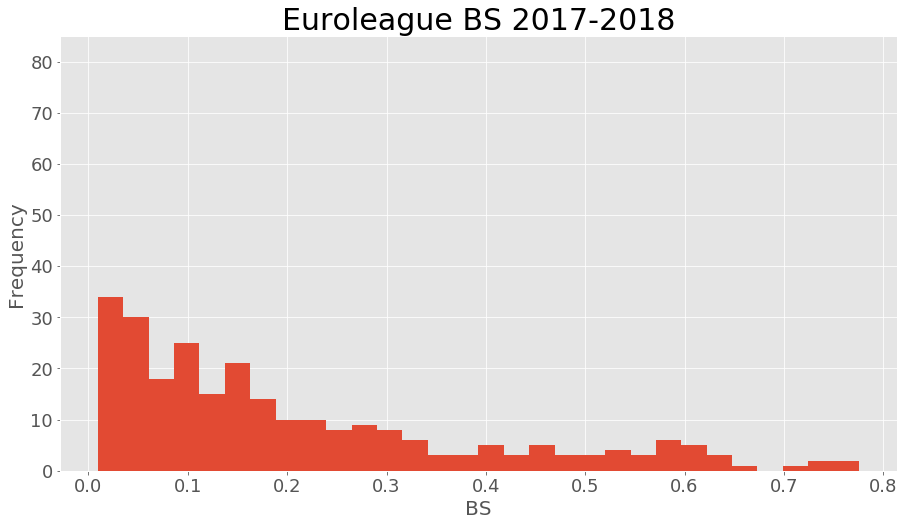

In [54]:
plt.figure(figsize=(15,8))

plt.hist(see_final_el["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Euroleague BS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()

In [55]:
see_final_g=x1_el[["Home Team","Away Team","Team Result","Match Date"]][x1_el["Match Date"]>"2017-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [56]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

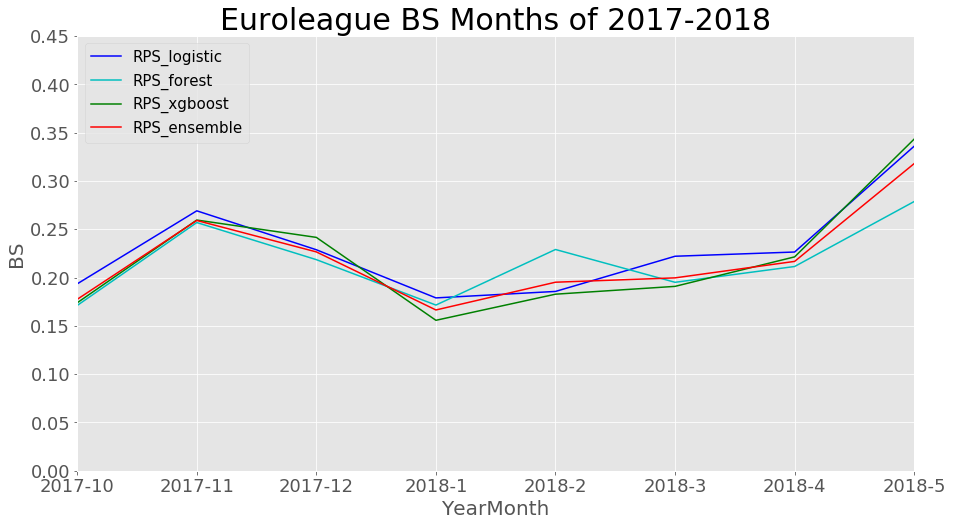

In [57]:
res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Euroleague BS Months of 2017-2018',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()

# Eurocup

In [58]:
eurocup_features = pd.read_csv('Features_Per_Tournament/eurocup_features.csv',sep = ',')

x_ec = eurocup_features.iloc[:,:-1]
y_ec = eurocup_features.iloc[:,-1]

x1_ec = data[(data['Tournament'] =="Eurocup")&(data['Match Date'] >"2014-8-01")]

In [59]:
x_ec.head(5)

,tradition_winner_match,tradition_winner_general,tradition_pointsdiff_match,tradition_pointsdiff_general,tradition_Ediff_match,tradition_Ediff_general,tradition_winner_last_match,tradition_pointsdiff_last_match,tradition_Ediff_between_last_match,pi_ratings,elo,pagerank,history_winner,history_pointsdiff,history_pointsdiff_sd,history_Ediff,history_Ediff_sd,history_FIC,history_Performance_Index,history_Game_Score,history_Drtg,history_Ortg,history_Play,history_Points,history_TS,history_EFG,history_FIC_sd,history_Performance_Index_sd,history_Game_Score_sd,history_Drtg_sd,history_Ortg_sd,history_Play_sd,history_Points_sd,history_TS_sd,history_EFG_sd,history_FIC_received,history_Performance_Index_received,history_Game_Score_received,history_Play_received,history_Points_received,history_TS_received,history_EFG_received,history_FIC_received_sd,history_Performance_Index_received_sd,history_Game_Score_received_sd,history_Play_received_sd,history_Points_received_sd,history_TS_received_sd,history_EFG_received_sd,Current_form_pi_ratings,Current_form_elo,Current_form_pagerank,Current_form_winner,Current_form_pointsdiff,Current_form_pointsdiff_sd,Current_form_EDiff,Current_form_EDiff_sd,Current_form_FIC,Current_form_Performance_Index,Current_form_Game_Score,Current_form_Drtg,Current_form_Ortg,Current_form_Play,Current_form_Points,Current_form_TS,Current_form_EFG,Current_form_FIC_sd,Current_form_Performance_Index_sd,Current_form_Game_Score_sd,Current_form_Drtg_sd,Current_form_Ortg_sd,Current_form_Play_sd,Current_form_Points_sd,Current_form_TS_sd,Current_form_EFG_sd,Current_form_FIC_received,Current_form_Performance_Index_received,Current_form_Game_Score_received,Current_form_Play_received,Current_form_Points_received,Current_form_TS_received,Current_form_EFG_received,Current_form_FIC_received_sd,Current_form_Performance_Index_received_sd,Current_form_Game_Score_received_sd,Current_form_Play_received_sd,Current_form_Points_received_sd,Current_form_TS_received_sd,Current_form_EFG_received_sd,Tournament_Points_difference,Tournament_Points_difference_sd,Tournament_EDiff,Tournament_EDiff_sd,Tournament_FIC,Tournament_Performance_Index,Tournament_Game_Score,Tournament_Drtg,Tournament_Play,Tournament_TS,Tournament_EFG,Tournament_FIC_sd,Tournament_Performance_Index_sd,Tournament_Game_Score_sd,Tournament_Drtg_sd,Tournament_Play_sd,Tournament_Points_sd,Tournament_TS_sd,Tournament_EFG_sd,Tournament_home_winner,Last 32,Quarter-Finals,Regular Season,Semifinals,Top 16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.398458,-39550.611764,-0.020883,-0.6875,-7.0,-11.099773,0.000000,-15.709625,-62.967188,-92.725000,-64.85000,-106.232495,-115.688335,-46.179825,-84.537500,-60.826936,-57.531261,-5.996540,-7.714341,-6.418693,-16.532045,-10.124760,-4.587301,-4.598061,-5.499607,-6.526387,-57.326563,-84.600000,-58.237500,-43.624422,-77.537500,-54.953186,-51.142721,-16.017463,-22.075451,-17.247322,-7.798415,-13.248384,-9.051773,-9.740585,0.000000,0.000000,0.000000,-0.5,-3.8,-10.825750,0.000000,-15.211718,-61.912500,-90.100000,-63.720000,-108.459706,-113.129415,-45.210481,-84.900000,-59.005040,-55.962161,-6.028169,-7.706118,-6.312949,-17.720645,-8.765632,-4.085032,-5.038795,-5.524399,-6.852906,-60.075000,-89.300000,-61.710000,-43.706813,-81.100000,-56.169008,-51.673847,-17.637511,-23.797436,-19.116391,-8.795534,-13.284104,-10.199936,-11.255015,4.868852,13.736962,6.834283,19.539209,9.190574,12.734973,8.709563,-6.834283,2.552050,2.871582,2.598756,0.466538,-0.360722,-0.245358,1.048563,-0.304309,-0.748942,-0.567115,-0.392937,0.647541,0,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.567232,-7348.935205,-0.002522,-0.2000,-1.1,-2.515280,-0.616624,-5.023638,1.675000,-2.800000,0.87000,3.612339,2.995714,2.034597,1.500000,-0.870461,0.772309,2.889439,6.404285,4.427149,-5.567427,4.538778,0.017942,4.857271,1.693745,-0.135722,5.650000,12.700000,5.430000,1.271771,2.600000,2.529317,1.520966,-2.780507,-3.144940,-2.438125,-1.847223,0.323648,-5.026337,-4.761800,7.627974,-31387.021604,0.005677,-0

In [60]:
corr_df =eurocup_features.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
114,Team Result,1.000000
55,Current_form_EDiff,0.307344
13,history_pointsdiff,0.307008
53,Current_form_pointsdiff,0.306477
15,history_Ediff,0.305595
52,Current_form_winner,0.245197
10,elo,0.234510
12,history_winner,0.227710
9,pi_ratings,0.200797
3,tradition_pointsdiff_general,0.176099


## Classifiers

In [61]:
x_ec_scaled = MinMaxScaler().fit_transform(x_ec)

In [62]:
x_train_ec=x_ec_scaled[:len(x1_ec[x1_ec["Match Date"]<"2017-8-1"])]
y_train_ec=y_ec.iloc[:len(x1_ec[x1_ec["Match Date"]<"2017-8-1"])]
x_test_ec=x_ec_scaled[len(x1_ec[x1_ec["Match Date"]<"2017-8-1"]):]
y_test_ec=y_ec.iloc[len(x1_ec[x1_ec["Match Date"]<"2017-8-1"]):]

## Logistic Regression

In [63]:
lgr = LogisticRegression(solver="liblinear",C=0.11202934112738094, penalty= 'l2').fit(x_train_ec,y_train_ec)
y_pre_proba_lgr=lgr.predict_proba(x_test_ec)
print("Logistic Regression")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_lgr[:,1]),3))
print()
y_pre_lgr=np.where(y_pre_proba_lgr[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_lgr ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_lgr,y_test_ec),3))

Logistic Regression

Test BS: 0.216

Test Accuracy: 0.641

Test F1-score: 0.748


In [64]:
coef_dict = {}
for coef, feat in zip(lgr.coef_[:].tolist()[0],x_ec.columns.values):
    coef_dict[feat] = coef
coef1=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef1=coef1.iloc[(-coef1[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef1,'eurocup')
sorted_coef1

,feature_name,value
0,Current_form_pointsdiff,0.408319
1,Current_form_EDiff,0.401578
2,history_pointsdiff,0.386460
3,history_Ediff,0.370407
4,pi_ratings,0.357558
5,elo,0.338858
6,Current_form_winner,0.314444
7,tradition_Ediff_general,0.219393
8,history_Performance_Index_received,-0.217662
9,Current_form_Performance_Index_received,-0.213303


## Random Forest Classifier

In [65]:
rfc = RandomForestClassifier(max_depth= 20, max_features='log2', min_samples_leaf=0.018815423604170822,
                             min_samples_split=0.231123081097249, n_estimators=41,
                             random_state=2).fit(x_train_ec, y_train_ec)

y_pre_proba_rfc=rfc.predict_proba(x_test_ec)
print("Random Forest Classifier")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_rfc[:,1]),3))
print()
y_pre_rfc=np.where(y_pre_proba_rfc[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_rfc ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_rfc,y_test_ec),3))

Random Forest Classifier

Test BS: 0.205

Test Accuracy: 0.668

Test F1-score: 0.761


In [66]:
coef_dict = {}
for coef, feat in zip(rfc.feature_importances_[:].tolist(),x_ec.columns.values):
    coef_dict[feat] = coef
coef2=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef2=coef2.iloc[(-coef2[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef2,'eurocup')
sorted_coef2

,feature_name,value
0,history_pointsdiff,0.099219
1,history_Points_received,0.054385
2,Current_form_FIC_received,0.048568
3,history_Ediff,0.042993
4,Current_form_Performance_Index_received,0.042440
5,pi_ratings,0.042391
6,Current_form_EDiff,0.037333
7,history_winner,0.035377
8,Current_form_pointsdiff,0.030460
9,tradition_pointsdiff_general,0.027442


## xgboost

In [67]:
alg = XGBClassifier(colsample_bytree=0.18034283170379617,gamma = 2.688094427224775,learning_rate= 0.08143707355158153, 
                    max_depth=1,n_estimators=46,reg_lambda= 0.9440898051715958,subsample=0.46431618708247235,
                    objective='binary:logistic').fit(x_train_ec, y_train_ec)

y_pre_proba_alg=alg.predict_proba(x_test_ec)
print("xgboost")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,y_pre_proba_alg[:,1]),3))
print()
y_pre_alg=np.where(y_pre_proba_alg[:,1] > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(y_pre_alg ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(y_pre_alg,y_test_ec),3))


xgboost

Test BS: 0.21

Test Accuracy: 0.69

Test F1-score: 0.759


In [68]:
coef_dict = {}
for coef, feat in zip(alg.feature_importances_[:].tolist(),x_ec.columns.values):
    coef_dict[feat] = coef
coef3=pd.DataFrame.from_dict(coef_dict,orient ='index')
sorted_coef3=coef3.iloc[(-coef3[0].abs()).argsort()].reset_index().rename(columns = {'index':'feature_name',0:'value'})
features_creation().features_count(sorted_coef3,'eurocup')
sorted_coef3

,feature_name,value
0,elo,0.057778
1,Current_form_FIC_received,0.055310
2,pi_ratings,0.054314
3,Current_form_EDiff,0.053473
4,Current_form_Performance_Index_received,0.050708
5,Current_form_Game_Score_received,0.039904
6,history_Ortg,0.038173
7,history_Points_received,0.037334
8,history_Ediff,0.035710
9,Current_form_EFG_sd,0.032326


# Ensemble

In [69]:
ens_proba=(y_pre_proba_lgr[:,1]+y_pre_proba_rfc[:,1]+y_pre_proba_alg[:,1])/3


print("------Ensemble 3 classifier-------")
print()
print("Test BS:",round(brier_score_loss(y_test_ec,ens_proba),3))
print()
ens_pred=np.where(ens_proba > 0.5, 1, 0)
print("Test Accuracy:",round(accuracy_score(ens_pred ,y_test_ec),3))
print()
print("Test F1-score:",round(f1_score(ens_pred,y_test_ec),3))

------Ensemble 3 classifier-------

Test BS: 0.209

Test Accuracy: 0.668

Test F1-score: 0.753


In [70]:
see_final_ec=x1_ec[["Home Team","Away Team","Team Result"]][x1_ec["Match Date"]>"2017-8-1"]
see_final_ec["prediction probability"]=y_pre_proba_alg[:,1]
see_final_ec["RPS"]=(see_final_ec["Team Result"]-see_final_ec["prediction probability"])**2
see_final_ec[see_final_ec["RPS"]>0.5]

,Home Team,Away Team,Team Result,prediction probability,RPS
4308,Hapoel Jerusalem,Buducnost,0.0,0.782322,0.612028
4391,Galatasaray,Lietkabelis,0.0,0.749183,0.561276
4613,Darussafaka,Turin,0.0,0.769223,0.591705
4671,Turin,Bayern Munich,1.0,0.258782,0.549405
4677,Rytas Vilnius,Zenit St Petersburg,0.0,0.714439,0.510423
4786,Gran Canaria,Galatasaray,0.0,0.728908,0.531307


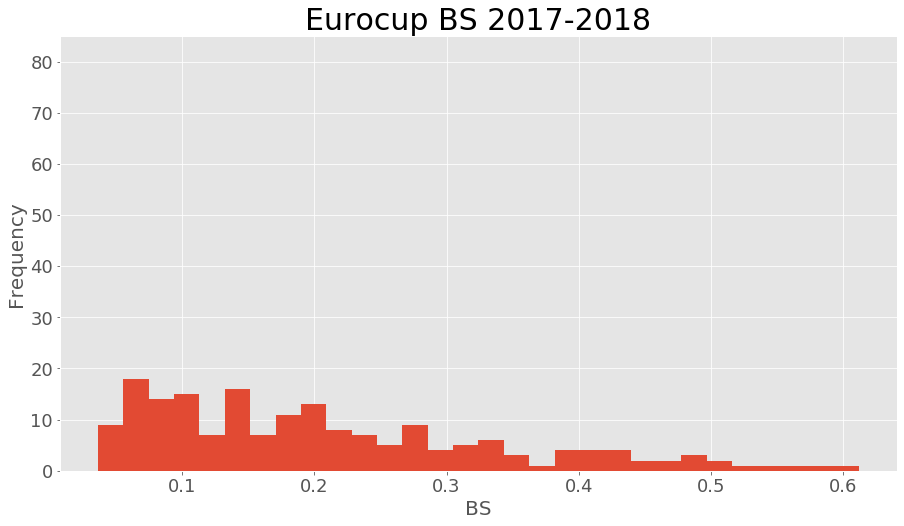

In [71]:
plt.figure(figsize=(15,8))

plt.hist(see_final_ec["RPS"], 30, density=0)

plt.xlabel('BS',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Eurocup BS 2017-2018',fontsize=30)
plt.ylim(0,85)
plt.show()

In [72]:
see_final_g=x1_ec[["Home Team","Away Team","Team Result","Match Date"]][x1_ec["Match Date"]>"2017-8-1"]
see_final_g["prediction probability logistic"]=y_pre_proba_lgr[:,1]
see_final_g["prediction probability forest"]=y_pre_proba_rfc[:,1]
see_final_g["prediction probability xgboost"]=y_pre_proba_alg[:,1]
see_final_g["prediction probability ensemble"]=ens_proba


see_final_g["RPS_logistic"]=(see_final_g["Team Result"]-see_final_g["prediction probability logistic"])**2
see_final_g["RPS_forest"]=(see_final_g["Team Result"]-see_final_g["prediction probability forest"])**2
see_final_g["RPS_xgboost"]=(see_final_g["Team Result"]-see_final_g["prediction probability xgboost"])**2
see_final_g["RPS_ensemble"]=(see_final_g["Team Result"]-see_final_g["prediction probability ensemble"])**2

In [73]:
see_final_g['YearMonth'] = pd.to_datetime(see_final_g['Match Date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

res = see_final_g.groupby('YearMonth')["RPS_logistic","RPS_forest","RPS_xgboost","RPS_ensemble"].mean()#.reset_index
#res["YearMonth"] = pd.to_datetime(res["YearMonth"])

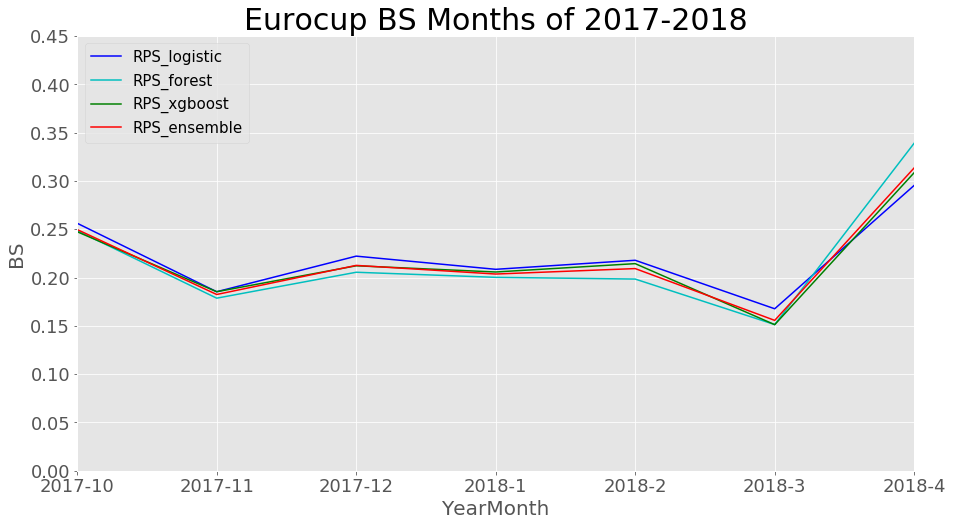

In [74]:

res.plot(figsize=(15,8),color = ["b","c","g","r"])
plt.xlabel('YearMonth',fontsize=20)
plt.ylabel('BS',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Eurocup BS Months of 2017-2018',fontsize=30)
plt.ylim(0,0.45)
plt.legend(loc=2,prop={'size': 15})
plt.show()